## Importing the libraries

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np

In [35]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text  import CountVectorizer

## Importing the Data

In [36]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [37]:
df = pd.read_csv(r"C:\Users\laxmi\Downloads\spam.csv")

In [38]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df.shape

(5572, 2)

## Ham_Words

In [40]:
#!pip install WordCloud

In [41]:
#from wordcloud import WordCloud
#import matplotlib.pyplot as plt

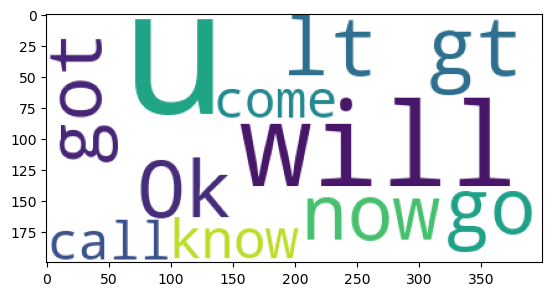

In [42]:
ham_words = " ".join(df[df["Category"] == "ham"]["Message"].values)
ham_plot = WordCloud(max_words=10,background_color="white").generate(ham_words)
plt.imshow(ham_plot)

## Spam_Words

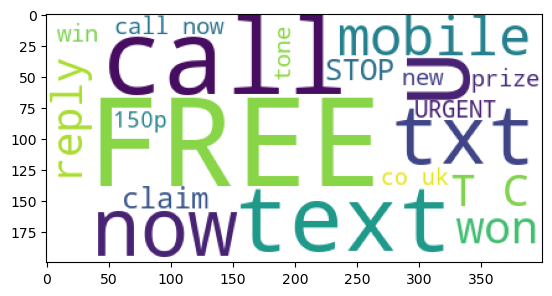

In [43]:
spam_words = " ".join(df[df["Category"] == "spam"]["Message"].values)
spam_plot = WordCloud(max_font_size=100,
                      max_words=20,
                      background_color="white").generate(spam_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

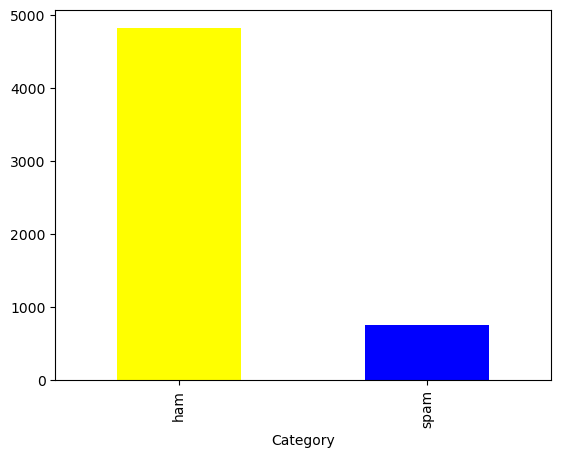

In [44]:
df["Category"].value_counts().plot(kind="bar",color = ["Yellow","blue"])

In [45]:
X = df.drop("Category",axis = 1)

## Bag Of Words

In [46]:
#from sklearn.feature_extraction.text  import CountVectorizer

In [47]:
bow =CountVectorizer(stop_words="english")

In [48]:
bow.fit(df["Message"])
X = bow.transform(df["Message"]).toarray()
y = df["Category"]   # separate the input and output

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_text,y_train,y_text = train_test_split(X,y,test_size = 0.2,random_state=24)

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_text)
accuracy_score(y_text,y_pred)

0.9112107623318386

## Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_text)
accuracy_score(y_text,y_pred)

0.979372197309417

In [55]:
import pickle

In [56]:
pickle.dump(nb,open("model.pkl","wb"))

In [57]:
pickle.dump(bow,open("model1.pkl","wb"))

In [58]:
model = pickle.load(open("model.pkl","rb"))

In [59]:
model.predict("I am data")

ValueError: Expected 2D array, got scalar array instead:
array=I am data.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Desicion Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = MultinomialNB()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_text)
accuracy_score(y_text,y_pred)

0.979372197309417

## Linear Classification

In [62]:
from sklearn.linear_model import L

ImportError: cannot import name 'L' from 'sklearn.linear_model' (C:\Users\laxmi\anaconda3\Lib\site-packages\sklearn\linear_model\__init__.py)

## Deployement

In [63]:
email = input("Enter the email ID:  ")
data = bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the email ID:   hi


'ham'